In [2]:
library(tidyverse)
library(ggpubr)
library(rstatix)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [3]:
# Eickhoff = '/cubric/data/c1639425/Monkey_Brains/results_df/proportion_eickhoff_streamline_corrected_bst_subic_ncc_ant_thal_extglobpal_df'
# geschwind = /cubric/data/c1639425/Monkey_Brains/results_df/proportion_gschwind_bst_ncc_subic_antthal_globpal_df
# Eichoff cols = Subjects,subic_bst,subic_ant_thal,subic_ncc,subic_ext_glob_pal
#geschwind cols = Subjects,bst_subic,subic_ant_thal,ncc_subic,subic_ext_glob_pal
df_wide = read_csv('/cubric/data/c1639425/Monkey_Brains/results_df/proportion_gschwind_bst_ncc_subic_antthal_globpal_df')

df_wide = df_wide %>%
  select(Subjects,bst_subic,subic_ant_thal,ncc_subic,subic_ext_glob_pal)

print(df_wide)

Parsed with column specification:
cols(
  Subjects = col_character(),
  bst_ncc = col_double(),
  bst_subic = col_double(),
  bst_ant_thal = col_double(),
  bst_ext_glob_pal = col_double(),
  ncc_subic = col_double(),
  ncc_ant_thal = col_double(),
  ncc_ext_glob_pal = col_double(),
  subic_ant_thal = col_double(),
  subic_ext_glob_pal = col_double(),
  ant_thal_ext_glob_pal = col_double()
)



# A tibble: 9 x 5
  Subjects bst_subic subic_ant_thal ncc_subic subic_ext_glob_pal
  <chr>        <dbl>          <dbl>     <dbl>              <dbl>
1 sub-01     0.0259        0.0489    0.00888            0.0102  
2 sub-02     0.0198        0.00629   0.0199             0.0353  
3 sub-03     0.00177       0.000703  0.000613           0.00239 
4 sub-04     0.00364       0.00743   0.00114            0.000716
5 sub-05     0.00982       0.0337    0.00413            0.00409 
6 sub-06     0.0263        0.103     0.00720            0.00537 
7 sub-07     0.00111       0.0177    0.000201           0.000672
8 sub-08     0.0186        0.0456    0.00879            0.00215 
9 sub-09     0.00949       0.0311    0.00785            0.00438 


In [4]:
df <- df_wide %>%
  gather(key = "ROI", value = "proportion",bst_subic,subic_ant_thal,ncc_subic,subic_ext_glob_pal) %>%
  convert_as_factor(Subjects, ROI)
print(df)

# A tibble: 36 x 3
   Subjects ROI            proportion
   <fct>    <fct>               <dbl>
 1 sub-01   bst_subic         0.0259 
 2 sub-02   bst_subic         0.0198 
 3 sub-03   bst_subic         0.00177
 4 sub-04   bst_subic         0.00364
 5 sub-05   bst_subic         0.00982
 6 sub-06   bst_subic         0.0263 
 7 sub-07   bst_subic         0.00111
 8 sub-08   bst_subic         0.0186 
 9 sub-09   bst_subic         0.00949
10 sub-01   subic_ant_thal    0.0489 
# … with 26 more rows


In [5]:
sumstats <- df %>%
  group_by(ROI) %>%
  get_summary_stats(proportion, type = "mean_sd")
print(sumstats)

# A tibble: 4 x 5
  ROI                variable       n  mean    sd
  <fct>              <chr>      <dbl> <dbl> <dbl>
1 bst_subic          proportion     9 0.013 0.01 
2 ncc_subic          proportion     9 0.007 0.006
3 subic_ant_thal     proportion     9 0.033 0.032
4 subic_ext_glob_pal proportion     9 0.007 0.011


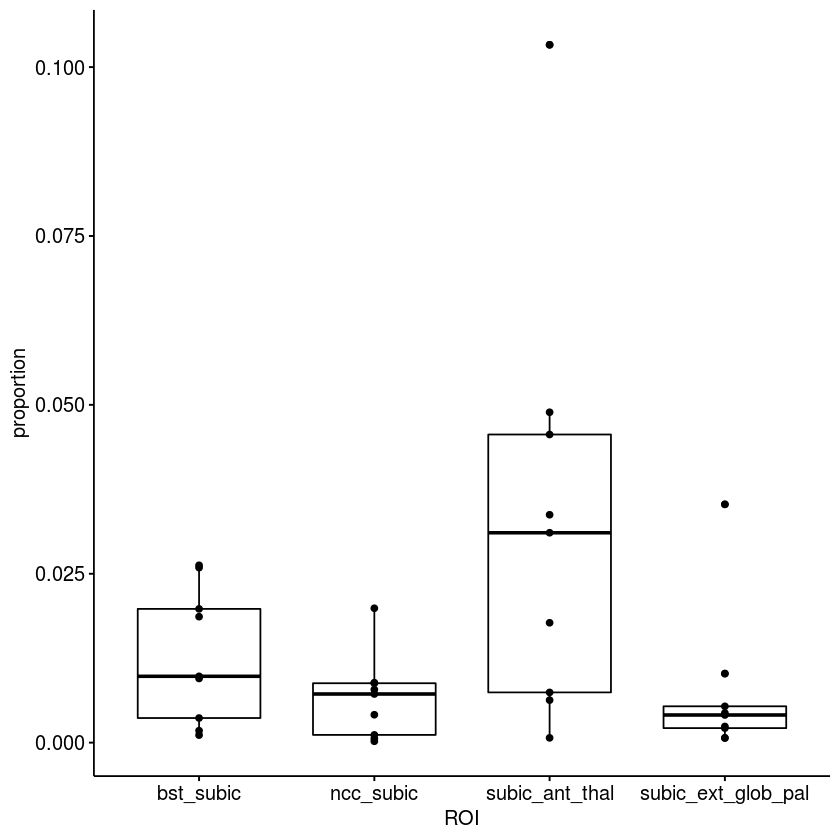

In [6]:
bxp <- ggboxplot(df, x = "ROI", y = "proportion", add = "point")
bxp

In [7]:
# Test for outliers
outliers <- df %>%
  group_by(ROI) %>%
  identify_outliers(proportion)
print(outliers)

# A tibble: 3 x 5
  ROI                Subjects proportion is.outlier is.extreme
  <fct>              <fct>         <dbl> <lgl>      <lgl>     
1 subic_ant_thal     sub-06       0.103  TRUE       FALSE     
2 subic_ext_glob_pal sub-01       0.0102 TRUE       FALSE     
3 subic_ext_glob_pal sub-02       0.0353 TRUE       TRUE      


In [8]:
# Replace outliers, easier to do this in the wide Df

# Remove completely 
# df_outliers_rm <- df_wide %>% filter(subic_ext_glob_pal < 0.0204)


df_outliers_rm <- df_wide %>% mutate(subic_ext_glob_pal=replace(subic_ext_glob_pal, subic_ext_glob_pal>0.03, NA))

print(df_outliers_rm)

# A tibble: 9 x 5
  Subjects bst_subic subic_ant_thal ncc_subic subic_ext_glob_pal
  <chr>        <dbl>          <dbl>     <dbl>              <dbl>
1 sub-01     0.0259        0.0489    0.00888            0.0102  
2 sub-02     0.0198        0.00629   0.0199            NA       
3 sub-03     0.00177       0.000703  0.000613           0.00239 
4 sub-04     0.00364       0.00743   0.00114            0.000716
5 sub-05     0.00982       0.0337    0.00413            0.00409 
6 sub-06     0.0263        0.103     0.00720            0.00537 
7 sub-07     0.00111       0.0177    0.000201           0.000672
8 sub-08     0.0186        0.0456    0.00879            0.00215 
9 sub-09     0.00949       0.0311    0.00785            0.00438 


# A tibble: 36 x 3
   Subjects ROI            proportion
   <fct>    <fct>               <dbl>
 1 sub-01   bst_subic         0.0259 
 2 sub-02   bst_subic         0.0198 
 3 sub-03   bst_subic         0.00177
 4 sub-04   bst_subic         0.00364
 5 sub-05   bst_subic         0.00982
 6 sub-06   bst_subic         0.0263 
 7 sub-07   bst_subic         0.00111
 8 sub-08   bst_subic         0.0186 
 9 sub-09   bst_subic         0.00949
10 sub-01   subic_ant_thal    0.0489 
# … with 26 more rows


Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


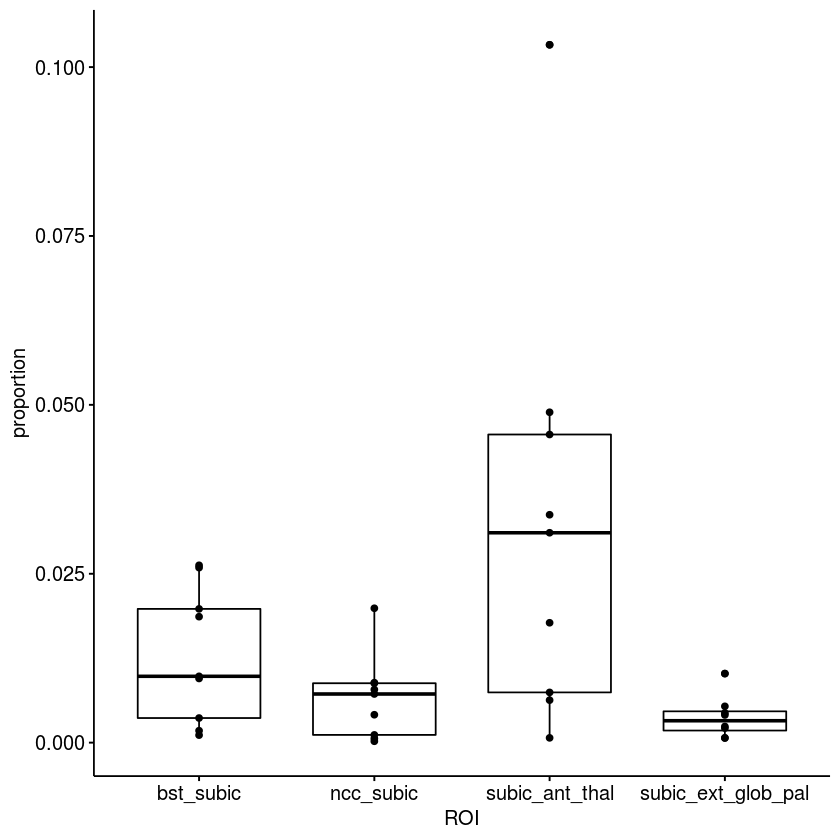

In [9]:
df <- df_outliers_rm %>%
  gather(key = "ROI", value = "proportion",bst_subic,subic_ant_thal,ncc_subic,subic_ext_glob_pal ) %>%
  convert_as_factor(Subjects, ROI)
print(df)

bxp <- ggboxplot(df, x = "ROI", y = "proportion", add = "point")
bxp

In [16]:
sumstats <- df %>%
  group_by(ROI) %>%
  get_summary_stats(proportion, type = "mean_sd")
print(sumstats)

# A tibble: 4 x 5
  ROI                variable       n  mean    sd
  <fct>              <chr>      <dbl> <dbl> <dbl>
1 bst_subic          proportion     9 0.013 0.01 
2 ncc_subic          proportion     9 0.007 0.006
3 subic_ant_thal     proportion     9 0.033 0.032
4 subic_ext_glob_pal proportion     8 0.004 0.003


In [11]:
# Check normal dist
normal <- df %>%
  group_by(ROI) %>%
  shapiro_test(proportion)
print(normal)


# A tibble: 4 x 4
  ROI                variable   statistic     p
  <fct>              <chr>          <dbl> <dbl>
1 bst_subic          proportion     0.894 0.218
2 ncc_subic          proportion     0.865 0.109
3 subic_ant_thal     proportion     0.867 0.115
4 subic_ext_glob_pal proportion     0.879 0.185


In [14]:
res.aov <- anova_test(data = df, dv = proportion, wid = Subjects, within = ROI)
get_anova_table(res.aov)

Warning message:
“NA detected in rows: 29.
Removing this rows before the analysis.”


,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,ROI,1.04,7.3,8.675,0.02,*,0.401


In [15]:
# pairwise comparisons
pwc <- df %>%
  pairwise_t_test(
    proportion ~ ROI, paired = TRUE,
    p.adjust.method = "fdr"
    )

pwc

,.y.,group1,group2,n1,n2,statistic,df,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,proportion,bst_subic,ncc_subic,9,9,2.645276,8,0.030,0.056,ns
2,proportion,bst_subic,subic_ant_thal,9,9,-2.338759,8,0.048,0.057,ns
3,proportion,bst_subic,subic_ext_glob_pal,9,9,2.883873,7,0.024,0.056,ns
4,proportion,ncc_subic,subic_ant_thal,9,9,-2.496654,8,0.037,0.056,ns
5,proportion,ncc_subic,subic_ext_glob_pal,9,9,1.109319,7,0.304,0.304,ns
6,proportion,subic_ant_thal,subic_ext_glob_pal,9,9,2.987225,7,0.020,0.056,ns
